# Primer Parcial

#### 01-4900 | 2C 2025

*Alumnos* :
*   MARTINEZ CANNELLA, IÑAKI
*   GHIANO, GONZALO AGUSTÍN
*   CHAILE, FACUNDO MARTIN
*   ALAZRAKI, MICAELA AGUSTINA
*   RINAUDO, DIEGO NAHUEL

*Grupo* :
Data y Familia

## Enunciado

La empresa “Business Prop SRL” contrata nuestros servicios para que le desarrollemos un
modelo que permita predecir si los departamentos vendidos pagan o no comisión, cuando su
precio de venta sea superior a un determinado valor.
Para ello, nos comparten un dataset llamado dptos_entrenamiento.csv, que contiene
información de departamentos vendidos en distintos lugares de Argentina y el exterior. Este
dataset será el que utilicemos para el entrenamiento del modelo construido.
El dataset de predicción a utilizar es dptos_predecir.csv, el cual no contiene la etiqueta de la
variable clase (por defecto viene indicada como “no paga”).

## Carga de Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Agregamos modelos de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer

import os


In [ ]:
#TODO: Funcion de ganancia
#TODO: Boxplot en univariado
#TODO: Heatmap
#TODO: Arbol para ver importancia de las variables
#TODO: PCA
#TODO: Imputar con KNN??????
#TODO: Carpeta 3, nb: 06_prestamos
#TODO: Listar correlacion entre variables y la target

## Lectura de los dataset

In [ ]:
# guardamos las url en variables
url_train = 'https://raw.githubusercontent.com/pokengineer/DataScience/refs/heads/main/assessment/dptos_entrenamiento.csv'
url_test = 'https://raw.githubusercontent.com/pokengineer/DataScience/refs/heads/main/assessment/dptos_predecir.csv'

# leemos los datos
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

# mostramos para tener una idea de como se ven los datos
print("Datos de Entrenamiento:", df_train.shape)
df_train.head()

Datos de Entrenamiento: (76984, 21)


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,title,paga_comision
0,RDfa+E7upD0n5pptEfHdMg==,Propiedad,2020-01-08,2020-01-11,2020-01-08,-37.999860,-57.555031,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Venta depto dos ambientes con frente abierto,no paga
1,mL0EoZeEqENVokwugUrtow==,Propiedad,2020-01-17,2020-01-21,2020-01-17,-34.566363,-58.438766,Argentina,Capital Federal,Palermo,...,NaN,NaN,4.0,3.0,1.0,81.0,75.0,NaN,VENTA 4 AMBIENTES C COCHERA FIJA MUY LUMINOSO,paga
2,hOZOY5Bo9FzB3IR8V6TtiA==,Propiedad,2019-11-15,9999-12-31,2019-11-15,-37.106865,-56.862300,Argentina,Buenos Aires Costa Atlántica,Pinamar,...,NaN,NaN,1.0,NaN,1.0,30.0,30.0,NaN,Monoambiente con entrepiso-A 150 mts de Av- Shaw-,no paga
3,JKfw+/BUerJ7cNjors3UBQ==,Propiedad,2019-07-14,9999-12-31,2019-07-14,NaN,NaN,Uruguay,Montevideo,NaN,...,NaN,NaN,3.0,2.0,1.0,62.0,54.0,Mensual,DEPARTAMENTO EN VENTA,no paga
4,SBDKF7R+J2C+n4gWm4JrOw==,Propiedad,2020-02-10,2020-04-28,2020-02-10,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,Departamento 3 ambientes a estrenar. Oportunid...,no paga


## Funcion de Ganancia

In [ ]:
## Poner funcion de ganancia aca
# Seguro queremos precision, preguntar

## Análisis Exploratorio

### Vistazo general de las variables

In [ ]:
display(df_train.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,76984,76984,RDfa+E7upD0n5pptEfHdMg==,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_type,76984,1,Propiedad,76984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_date,76984,363,2020-01-08,2960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_date,76984,257,9999-12-31,29793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_on,76984,363,2020-01-08,2960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,67643.0,NaN,NaN,NaN,-34.774702,2.900237,-54.812682,-34.748868,-34.603771,-34.558653,47.545277
lon,67498.0,NaN,NaN,NaN,-58.833661,2.112804,-111.611617,-58.552874,-58.437044,-58.363745,-48.38763
l1,76984,4,Argentina,74447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2,76984,31,Capital Federal,32608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l3,72486,294,Mar del Plata,9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analizando Variables Predictoras

In [6]:
## La columna ID no tiene nulos ni repetidos, podemos usarla como indice
df_train.set_index('id', inplace=True)

In [7]:
variables_a_eliminar = []

ad_type

In [8]:
## Un solo valor para todo el dataset, sin nulos, no tiene valor predictivo. Podemos eliminarla
print(df_train["ad_type"].dtype)
print(df_train["ad_type"].unique())

variables_a_eliminar.append("ad_type")

object
['Propiedad']


start_date

In [12]:
## Preguntar en clase, por ahora vacio
# con la resta end - start podemos ver cuanto tardo en venderse
dtype = df_train["start_date"].dtype
row_count = df_train["start_date"].count()
null_count = df_train["start_date"].isnull().sum()
unique = df_train["start_date"].unique()

print("Variable: start_date")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

Variable: start_date
Tipo de dato: object
Row count: 76984
Null count: 0


end_date

In [13]:
## Preguntar en clase, por ahora vacio
dtype = df_train["end_date"].dtype
row_count = df_train["end_date"].count()
null_count = df_train["end_date"].isnull().sum()
unique = df_train["end_date"].unique()

print("Variable: end_date")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

Variable: end_date
Tipo de dato: object
Row count: 76984
Null count: 0


created_on

In [ ]:
## La sacamos porque es igual a start_date, justificar con algo mas lindo
df_train.loc[df_train["created_on"] != df_train["start_date"]].count()

ad_type            0
start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
l4                 0
l5                 0
l6                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price_period       0
title              0
paga_comision      0
dtype: int64

l1

In [ ]:
dtype = df_train["l1"].dtype
row_count = df_train["l1"].count()
null_count = df_train["l1"].isnull().sum()
unique = df_train["l1"].unique()

print("Variable: l1")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")
print("Valores únicos")
print(unique)

Variable: l1
Tipo de dato: object
Row count: 76984
Null count: 0
Valores únicos
['Argentina' 'Uruguay' 'Estados Unidos' 'Brasil']


l2

In [ ]:
dtype = df_train["l2"].dtype
row_count = df_train["l2"].count()
null_count = df_train["l2"].isnull().sum()
unique = df_train["l2"].unique()

print("Variable: l2")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")
print("Valores únicos")
print(unique)

Variable: l2
Tipo de dato: object
Row count: 76984
Null count: 0
Valores únicos
['Buenos Aires Costa Atlántica' 'Capital Federal' 'Montevideo'
 'Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Sur' 'Córdoba' 'Santa Fe'
 'Maldonado' 'Bs.As. G.B.A. Zona Oeste' 'Mendoza' 'Buenos Aires Interior'
 'Neuquén' 'Canelones' 'Tucumán' 'Entre Ríos' 'Florida' 'Catamarca'
 'Río Negro' 'Misiones' 'Jujuy' 'La Pampa' 'Colonia' 'Miami' 'Chaco'
 'Santa Catarina' 'Salta' 'Corrientes' 'Chubut' 'San Juan' 'San Luis'
 'Tierra Del Fuego']


l3

In [ ]:
dtype = df_train["l3"].dtype
row_count = df_train["l3"].count()
null_count = df_train["l3"].isnull().sum()
unique_count = len(df_train["l3"].unique())

print("Variable: l3")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")
print(f"Valores únicos: {unique_count}")

Variable: l3
Tipo de dato: object
Row count: 72486
Null count: 4498
Valores únicos: 295


In [ ]:
## De los 295 valores que puede tomar la variable, 57 aparecen solo una vez.
l3_count = df_train.groupby('l3').size().reset_index(name='count')
l3_count.loc[l3_count["count"] < 2].count()

# Decidimos quitar la variable por ahora.
variables_a_eliminar.append("l3")

l4, l5 y l6

In [ ]:
l4_row_count = df_train["l4"].count()
l5_row_count = df_train["l5"].count()
l6_row_count = df_train["l6"].count()

print(f"Conteo l4: {l4_row_count}")
print(f"Conteo l5: {l5_row_count}")
print(f"Conteo l6: {l6_row_count}")

# Row count muy bajo, las eliminamos
variables_a_eliminar.append("l4")
variables_a_eliminar.append("l5")
variables_a_eliminar.append("l6")

Conteo l4: 14777
Conteo l5: 159
Conteo l6: 0


lat

In [ ]:
# Si no tuvieramos las variables l1 y l2 podría sernos útil, en este caso la descartamos.

dtype = df_train["lat"].dtype
row_count = df_train["lat"].count()
null_count = df_train["lat"].isnull().sum()

print("Variable: lat")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

variables_a_eliminar.append("lat")

Variable: lat
Tipo de dato: float64
Row count: 67643
Null count: 9341


Lon

In [ ]:
# Si no tuvieramos las variables l1 y l2 podría sernos útil, en este caso la descartamos.

dtype = df_train["lon"].dtype
row_count = df_train["lon"].count()
null_count = df_train["lon"].isnull().sum()

print("Variable: lon")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

variables_a_eliminar.append("lon")

Variable: lon
Tipo de dato: float64
Row count: 67498
Null count: 9486


rooms

In [ ]:
dtype = df_train["rooms"].dtype
row_count = df_train["rooms"].count()
null_count = df_train["rooms"].isnull().sum()

print("Variable: rooms")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

## Intuimos que puede tener poder predictivo, por ahora la mantenemos
## Podemos cambiar el tipo a INT
df_train['rooms'] = df_train['rooms'].astype('Int64')


Variable: rooms
Tipo de dato: float64
Row count: 59968
Null count: 17016


bedrooms

In [ ]:
dtype = df_train["bedrooms"].dtype
row_count = df_train["bedrooms"].count()
null_count = df_train["bedrooms"].isnull().sum()

print("Variable: bedrooms")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

## La mitad de los registros son nulos, se podrán imputar? Por ahora la mantenemos. 
## Podemos cambiar el tipo a INT
df_train['bedrooms'] = df_train['bedrooms'].astype('Int64')

Variable: bedrooms
Tipo de dato: float64
Row count: 38049
Null count: 38935


bathrooms

In [ ]:
dtype = df_train["bathrooms"].dtype
row_count = df_train["bathrooms"].count()
null_count = df_train["bathrooms"].isnull().sum()

print("Variable: bathrooms")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

## Pocos nulos, tendrá poder predictivo? Por ahora la mantenemos. 
## Podemos cambiar el tipo a INT
df_train['bathrooms'] = df_train['bathrooms'].astype('Int64')

Variable: bathrooms
Tipo de dato: float64
Row count: 71826
Null count: 5158


surface_total

In [ ]:
dtype = df_train["surface_total"].dtype
row_count = df_train["surface_total"].count()
null_count = df_train["surface_total"].isnull().sum()

print("Variable: surface_total")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

# Es un float64, tiene valores decimales?
valores_no_nulos = df_train["surface_total"].dropna()
cantidad_decimales = (valores_no_nulos % 1 != 0).sum()
print(f"Cantidad de registros con decimales: {cantidad_decimales}")

# Ningun registro tiene valores decimales, podríamos pasar la variable a INT.
df_train['surface_total'] = df_train['surface_total'].astype('Int64')

# Podría tener poder predictivo, por ahora la mantenemos.

Variable: surface_total
Tipo de dato: float64
Row count: 43049
Null count: 33935
Cantidad de registros con decimales: 0


surface_covered

In [ ]:
dtype = df_train["surface_covered"].dtype
row_count = df_train["surface_covered"].count()
null_count = df_train["surface_covered"].isnull().sum()

print("Variable: surface_covered")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")

# Es un float64, tiene valores decimales?
valores_no_nulos = df_train["surface_covered"].dropna()
cantidad_decimales = (valores_no_nulos % 1 != 0).sum()
print(f"Cantidad de registros con decimales: {cantidad_decimales}")

# Ningun registro tiene valores decimales, podríamos pasar la variable a INT.
df_train['surface_covered'] = df_train['surface_covered'].astype('Int64')

# Podría tener poder predictivo, por ahora la mantenemos.

Variable: surface_covered
Tipo de dato: float64
Row count: 45717
Null count: 31267
Cantidad de registros con decimales: 0


price_period

In [ ]:
dtype = df_train["price_period"].dtype
row_count = df_train["price_period"].count()
null_count = df_train["price_period"].isnull().sum()

print("Variable: price_period")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")
print(df_train["price_period"].unique())

## Solo Nulos y mensual. En clase sacar data de esta variable
## Los nulos serán tambien un dato? investigar

Variable: price_period
Tipo de dato: object
Row count: 25755
Null count: 51229
[nan 'Mensual']


title

In [ ]:
dtype = df_train["title"].dtype
row_count = df_train["title"].count()
null_count = df_train["title"].isnull().sum()

print("Variable: price_period")
print(f"Tipo de dato: {dtype}")
print(f"Row count: {row_count}")
print(f"Null count: {null_count}")
print(df_train["title"].unique())

## Es el titulo de la publicacion, no hay poder predictivo
variables_a_eliminar.append("title")

Variable: price_period
Tipo de dato: object
Row count: 76984
Null count: 0
['Venta depto dos ambientes con frente abierto'
 'VENTA 4 AMBIENTES C COCHERA FIJA MUY LUMINOSO'
 'Monoambiente con entrepiso-A 150 mts de Av- Shaw-' ...
 'Alsina  800 - U$D 95.000 - Departamento en Venta'
 'VENTA DEPARTAMENTO+LOFT 4 AMBIENTE EN MUÑIZ'
 'RETASADO!!! VENTA 3 AMB Exclusiva zona La Imprenta &amp; Cañitas-Frente-Balcón-Cochera ']


### Variable Target

In [21]:
# Oversampling? Undersampling?

pagan = df_train.loc[df_train["paga_comision"] == "paga"]["paga_comision"].count()
no_pagan = df_train.loc[df_train["paga_comision"] == "no paga"]["paga_comision"].count()
print(f"Paga: {pagan}")
print(f"No Paga: {no_pagan}")

Paga: 8772
No Paga: 68212


### Multivariado

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

def boxplotAndHist(na, binwidth=0.5):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(na, orient="h", ax=ax_box)
    sns.histplot(na, binwidth=binwidth, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

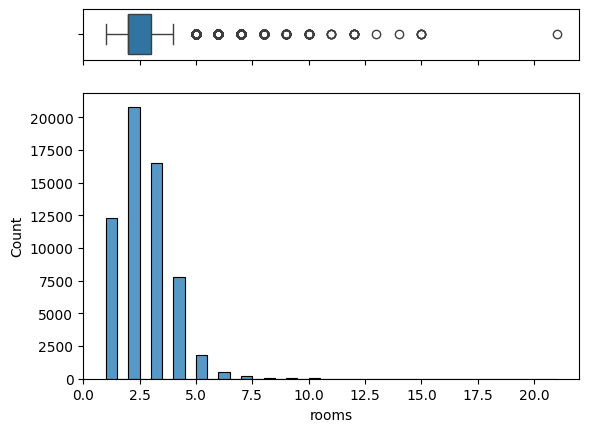

In [ ]:
## Univariado
boxplotAndHist(df_train["rooms"])

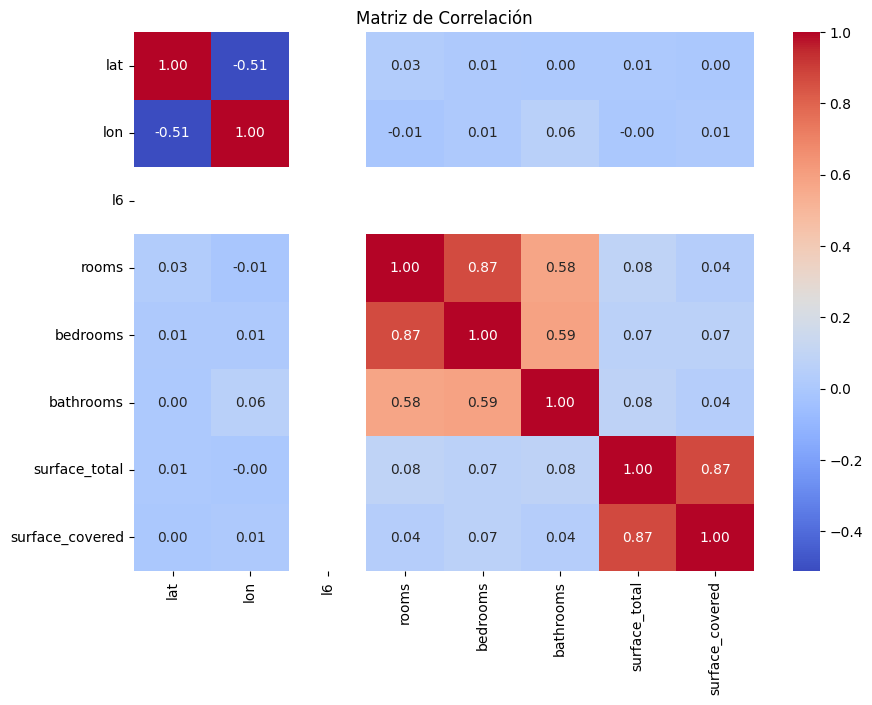

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
mat = df_train[df_train.columns].select_dtypes(include=['int', 'float']).corr()
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f",  ax=ax)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# PCA

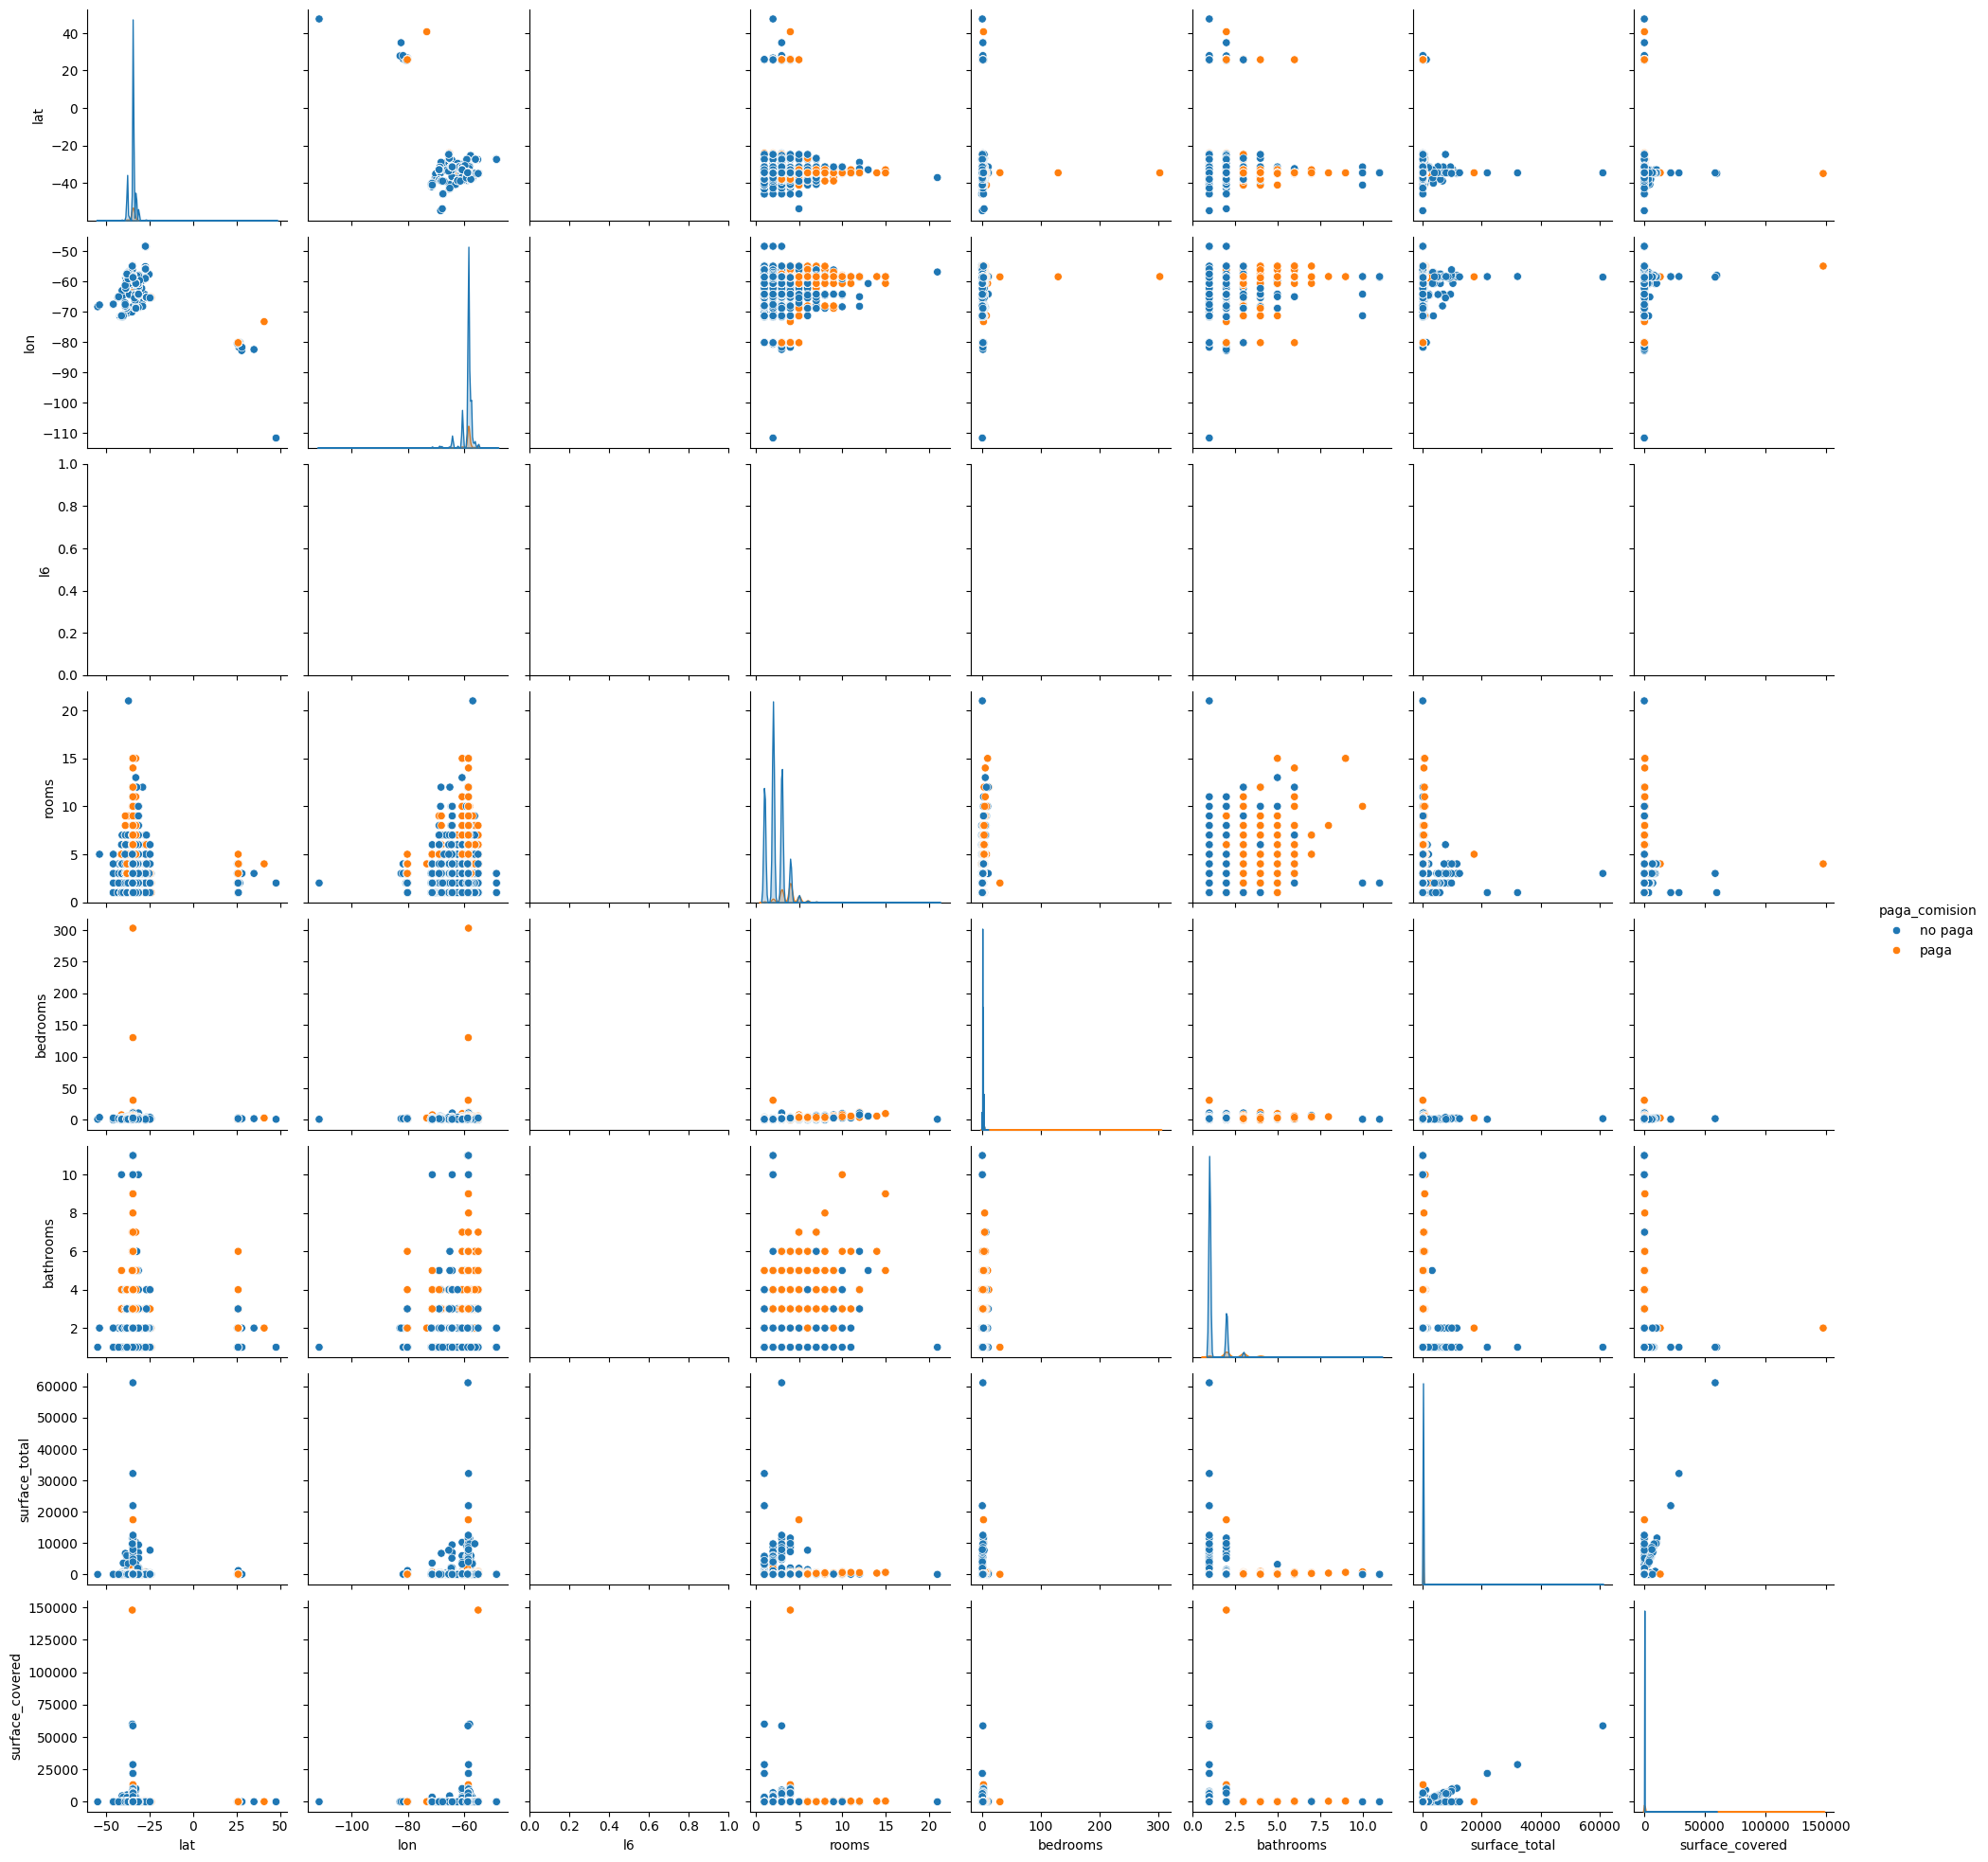

In [29]:
sns.pairplot(df_train,hue="paga_comision")

In [ ]:
##

### Valores faltantes o nulos

* Obtenemos el número de nulos existentes en los datasets
* Si alguna columna presenta nulos, debemos saber como analizar según el tipo de variable y el contexto. Por ejemplo, si es numérica debemos reemplazar con 0 o el avg; si es categórica, podemos reemplazar el nulo con un dato significativo

In [ ]:
missing_counts = df_train.isnull().sum().sort_values(ascending=False)
missing_perc = (missing_counts / df_train.shape[0]) * 100

df_missing = pd.DataFrame({
    "nulos": missing_counts,
    "pct_nulos": missing_perc.round(2)
}).loc[missing_perc > 0]  # solo se muestran las columnas con > 0% nulos

print("Columnas con valores faltantes:")
display(df_missing)

Columnas con valores faltantes:


,nulos,pct_nulos
l6,76984,100.00
l5,76825,99.79
l4,62207,80.81
price_period,51229,66.54
bedrooms,38935,50.58
surface_total,33935,44.08
surface_covered,31267,40.61
rooms,17016,22.10
lon,9486,12.32
lat,9341,12.13


In [ ]:
# evaluamos el impacto de eliminar filas con nulos

print("Cantidad total de filas:", df_train.shape[0])
print("Cantidad de filas sin ningún nulo:", df_train.dropna().shape[0])
print("Porcentaje de filas que conservarías:", round(100 * df_train.dropna().shape[0] / df_train.shape[0], 2), "%")

Cantidad total de filas: 76984
Cantidad de filas sin ningún nulo: 0
Porcentaje de filas que conservarías: 0.0 %


In [ ]:
# según el resultado anterior, vemos que todas las filas del dataset tienen al menos un valor nulo, por lo que eliminar filas no es una opción viable. 
# si hacemos dropna() perderíamos todo el dataset.

# vemos cuantos nulos hay por columna
total_filas = df_train.shape[0]
nulos_por_col = df_train.isnull().sum().sort_values(ascending=False)
porcentaje_nulos = (nulos_por_col / total_filas)

nulos_df = pd.DataFrame({
    'Nulos': nulos_por_col,
    'Porcentaje': porcentaje_nulos.round(2)
})

display(nulos_df.head(20))  # solo nos quedamos con las primeras 20 filas con nulos

,Nulos,Porcentaje
l6,76984,1.00
l5,76825,1.00
l4,62207,0.81
price_period,51229,0.67
bedrooms,38935,0.51
surface_total,33935,0.44
surface_covered,31267,0.41
rooms,17016,0.22
lon,9486,0.12
lat,9341,0.12


### Eliminación de columnas con muchos nulos (usando un umbral)

In [ ]:
umbral_nulos = 0.8 ## preguntar!!

# identificamos las columnas que superan el umbral de nulos
cols_muchos_nulos = porcentaje_nulos[porcentaje_nulos > umbral_nulos].index.tolist()

print("Columnas con más del % de nulos establecido (", umbral_nulos*100, "%):")
print(cols_muchos_nulos)

# eliminamos las columnas con muchos nulos
df_limpio = df_train.drop(columns=cols_muchos_nulos)

print("\nDataset reducido de forma que se eliminaron las columnas con muchos nulos:")
print("Forma original:", df_train.shape)    
print("Forma reducida:", df_limpio.shape)

###### chequeo ######

# vemos el porcentaje total de celdas nulas en el dataset limpio
display(df_limpio.isnull().mean().sort_values(ascending=True).head(20))


Columnas con más del % de nulos establecido ( 80.0 %):
['l6', 'l5', 'l4']

Dataset reducido de forma que se eliminaron las columnas con muchos nulos:
Forma original: (76984, 20)
Forma reducida: (76984, 17)


ad_type            0.000000
start_date         0.000000
end_date           0.000000
created_on         0.000000
l2                 0.000000
l1                 0.000000
title              0.000000
paga_comision      0.000000
l3                 0.058428
bathrooms          0.067001
lat                0.121337
lon                0.123220
rooms              0.221033
surface_covered    0.406149
surface_total      0.440806
bedrooms           0.505754
price_period       0.665450
dtype: float64

: 